<a name = "inicio"></a>

***

<div style="font-size: 30px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Notebook 2.2 Distribuciones de probabilidad en R </div>

<table>
  <tr>
    <td>
<div>
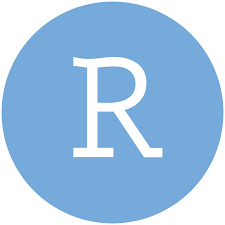
<td>&nbsp;</td><td>&nbsp;</td>
</div>
    </td>
    <td>
<div>
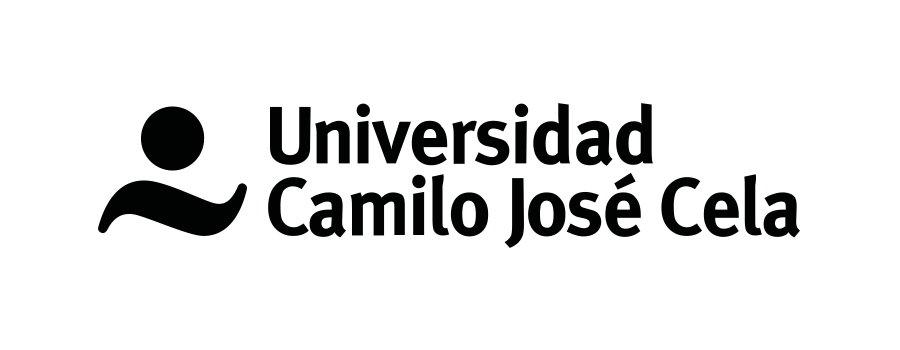
</div>       
</td>
  </tr>
<table>
    
<u>Índice de contenidos<u>:

1. [Introducción a las distribuciones de probabilidad](#topic1)
2. [Las principales distribuciones de probabilidad discretas](#topic2)
3. [Las principales distribuciones de probabilidad continuas](#topic3) 

***

# 1. Introducción a las distribuciones de probabilidad <a id="topic1"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


En un estudio inferencial, una vez tomada la muestra y obtenidos los datos sobre sus miembros, el siguiente paso es inferir, es decir, deducir información sobre la población a partir de estos datos. En este contexto aparacen dos conceptos importantes. Una `variable aleatoria` se puede definir como cualquier característica medible del fenómeno que estemos estudiando que toma diferentes valores con probabilidades determinadas. 

Toda variable aleatoria posee una distribución de probabilidad que describe su comportamiento. Por otro lado, una forma usual de describir la `distribución de probabilidad` de una variable aleatoria es mediante la denominada **función de masa de probabilidad** en el caso de variables discretas (si toma valores aislados dentro de un intervalo) y **función de densidad** en el caso de variables continuas (la variable puede tomar cualquier valor de un intervalo), en tanto que lo que se conoce como **función de distribución** representa las probabilidades acumuladas en ambos casos. En este notebook nos vamos a centrar en las siguientes cuestiones:

1. <u>Conocer las principales distribuciones de probabilidad</u> discretas y continuas

2. <u>Estimar las probabilidades</u> de una variable aleatoria que sigue una distribución discreta o continua

3. <u>Simular muestras</u> procedentes de una distribución discreta o continua

4. <u>Representar gráficamente</u> las funciones de masa, densidad y distribución

Es decir, dada una determinada distribución, ¿cómo estimar determinadas probabilidades, simular una muestra y representar gráficamente las funciones de masa, densidad y distribución? A continuación, veremos con algo más de detalle cómo podemos dar respuesta a cada uno de los objetivos planteados utilizando diversas **funciones definidas en R**.

# 2. Las principales distribuciones de probabilidad discretas <a id="topic2"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

La librería $\tt stats$ de R (que se instala por defecto al instalar R, y se carga en memoria siempre que iniciamos sesión) implementa numerosas funciones para la realización de cálculos asociados a distintas distribuciones de probabilidad. En particular, para cada una de las distribuciones discretas, R sabe calcular **cuatro funciones**, que se obtienen añadiendo un prefijo al nombre de la distribución:

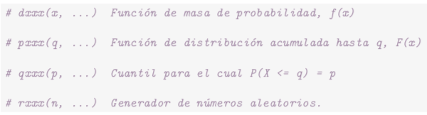

En el lugar de las letras ***xxx*** se debe de introducir el nombre de la distribución de probabilidad en la que estemos interesados. Os dejo por aquí un listado de las principales <u>distribuciones de probabilidad discretas</u>, con los valores que toman, los parámetros que las caracteriza y una breve definición de una variable tipo que siguiera cada una de las siguientes distribuciones.

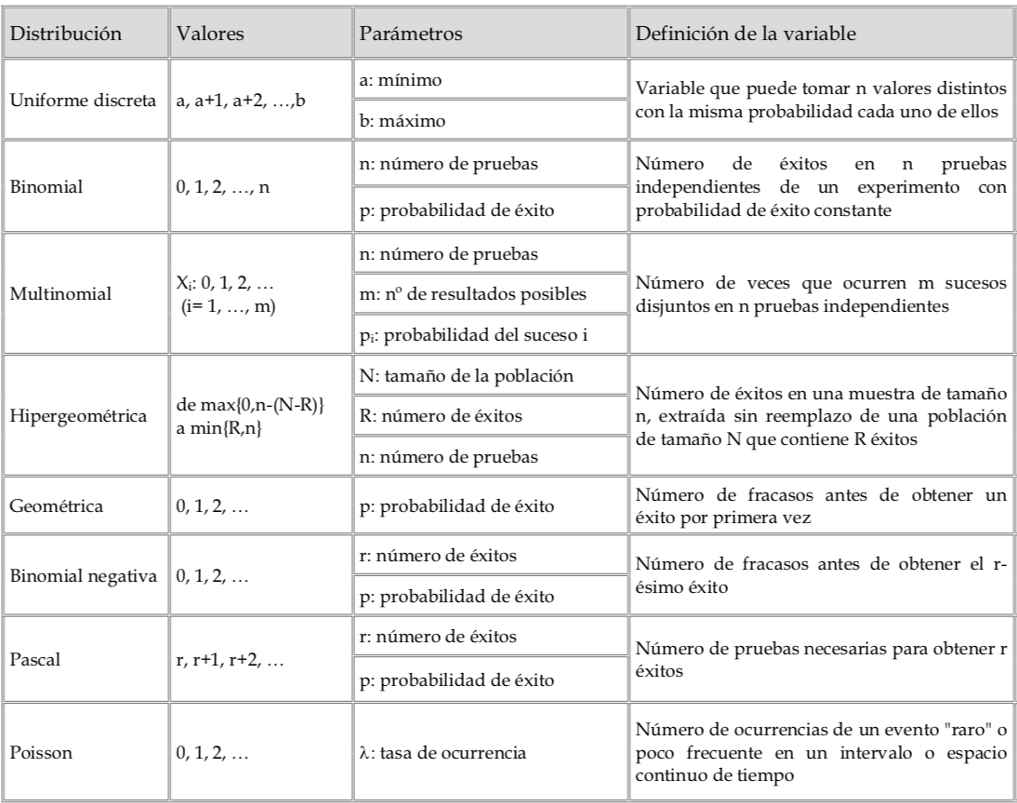

El listado de nombres disponibles para las **5 distribuciones discretas básicas** sería el siguiente:

+ $\tt unif$      # Uniforme
+ $\tt binom$     # Binomial
+ $\tt geom$      # Geométrica
+ $\tt hyper$     # Hipergeométrica
+ $\tt pois$      # Poisson

**Ejemplo 0 <mark>[funciones de R para distribuciones discretas]</mark>** Para la distribución uniforme, la función de masa se obtiene como $\tt dunif()$, la función de distribución como $\tt punif()$, y se pueden generar valores aleatorios con distribución uniforme mediante $\tt runif()$. Luego, combinando las funciones y los nombres se tiene un total de **15 funciones**. Otro ejemplo, para obtener la función de masa de probabilidad $f(x)$ de una binomial se usa la función $\tt dbinom( )$ y para obtener la función de distribución $F(x)$ de una Poisson se usa la función $\tt ppois( )$. Veamos cada una de ellas.

## 2.1 Distribución uniforme $(a,b)$

La **distribución uniforme** discreta describe el `comportamiento de una variable discreta que puede tomar n valores distintos con la misma probabilidad cada uno de ellos`. Esta distribución asigna igual probabilidad a todos los valores enteros entre el límite inferior y el límite superior que definen el recorrido de la variable. Si la variable puede tomar valores entre a y b, debe ocurrir que b sea mayor que a, y la variable toma los valores enteros empezando por a, a+1, a+2, etc. hasta el valor máximo b. 

**Ejemplo 1 <mark>[distribución uniforme]</mark>** Cuando se observa el número obtenido tras el lanzamiento de un dado perfecto, los valores posibles siguen una distribución uniforme discreta en {1, 2, 3, 4, 5, 6}, y la probabilidad de cada cara es 1/6.

**Ejemplo 2 <mark>[distribución uniforme bis]</mark>** El temario de un examen para el proceso de oposición al Cuerpo Superior de Estadísticos del Estado contiene 50 temas, de los cuales se elegirá uno por sorteo. Si una persona no ha estudiado los 15 últimos temas ¿cuál es la probabilidad de que salga un tema que haya estudiado?

La variable que representa el número del tema seleccionado para el examen sigue una distribución uniforme con parámetros a = 1 y b = 50. La persona ha estudiado los temas del 1 al 35; por tanto, la probabilidad que se pide es la cola a la izquierda de 35. Es decir,

In [11]:
help(punif)

In [12]:
# Queremos calcular la función de distribución acumulada (X<=35)
# P(X≤k)=punif(k,a,b)
punif(35,1,50)

[1] 0.6938776

**<u>Interpretación resultados</u>.-** La persona tiene una *probabilidad del 70%* de que el tema elegido sea uno de los que se ha estudiado.

In [13]:
# y si queremos calcular la probabilidad de que salga el tema 35 (función de masa para X=35)
# P(X=k)=dunif(k,a,b)
dunif(35,1,50)

[1] 0.02040816

In [14]:
# y si queremos calcular la probabilidad de que salga un tema de los que NO haya estudiado
# Tenemos que calcular la función de distribución acumulada (X>35)
1-punif(35,1,50)

[1] 0.3061224

**Ejemplo 3 <mark>[distribución uniforme bis]</mark>** Supongamos que tenemos una variable aleatoria X que sigue una distribución uniforme continua en el intervalo $[0, 1]$. Calcular la función de distribución acumulada y representarla gráficamente.

In [16]:
# Definimos el rango
rango <- c(0, 1); rango

[1] 0 1

In [22]:
# Generamos la secuencia numérica
x <- seq(0, 1, by = 0.01); x

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

In [19]:
# Calcular la función de distribución acumulativa
dist <- punif(x, min = rango[1], max = rango[2]); dist

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

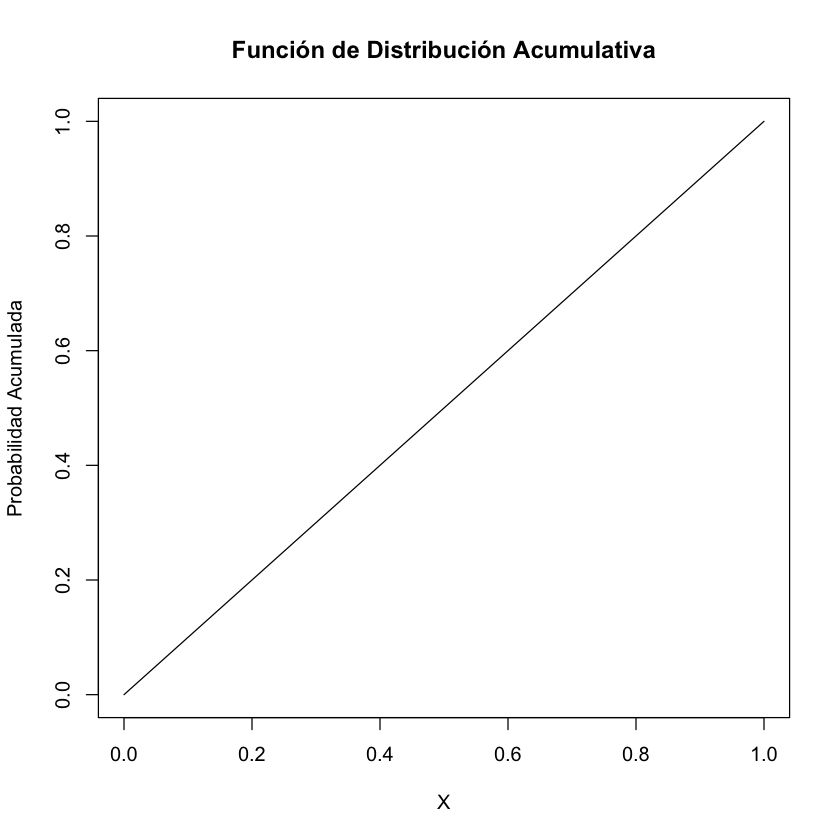

In [23]:
# Crear un gráfico de la función de distribución acumulativa
plot(x, dist, type = "l", main = "Función de Distribución Acumulativa", xlab = "X", ylab = "Probabilidad Acumulada")

**<u>Interpretación resultados</u>.-** Podemos ver que el crecimiento es lineal ya que el incremento es constante y proporcional al valor que toma la variable en cada momento, siendo igual a $0.01$.

## 2.2 Distribución binomial $(n,p)$

La **distribución binomial** es una distribución discreta muy importante que surge en muchas aplicaciones bioestadísticas. Fue obtenida por Jakob Bernoulli (1654-1705) y publicada en su obra póstuma *Ars Conjectandi* en 1713.

Esta distribución aparece de forma natural al realizar repeticiones independientes de un experimento que tenga respuesta binaria, generalmente clasificada como “éxito” o “fracaso”. La variable discreta que cuenta el `número de éxitos en n pruebas independientes de ese experimento, cada una de ellas con la misma probabilidad de “éxito” igual a $p$`, sigue una distribución binomial de parámetros $n$ y $p$. Un caso particular se tiene cuando $n=1$, que da lugar a la **distribución de Bernoulli**.

**Ejemplo 4 <mark>[distribución binomial]</mark>** Ejemplos de respuesta binaria pueden ser si un usuario utiliza redes sociales o no, si un paciente hospitalizado desarrolla o no una infección, o si un determinado producto de un lote o piezas que produce una máquina son o no defectuosas. Como podéis ver la definición de "éxito" es diferente en cada caso.

 **Ejemplo 5 <mark>[distribución binomial bis]</mark>** En un examen teórico de la asignatura de 'Análisis estadístico' formado por $20$ preguntas, cada una de las cuales se responde como "verdadero" o "falso", el alumno sabe que, históricamente, en el $75\%$ de los casos la respuesta correcta es "verdadero" y decide responder el examen al azar. Se desea saber cuál es la probabilidad de que tenga más de $14$ aciertos.

In [26]:
# Ayuda
help(pbinom)

In [28]:
# Queremos calcular la función de distribución acumulada (X>14)
1-pbinom(14,20,0.75)

[1] 0.6171727

**<u>Interpretación resultados</u>.-** La probabilidad de que el alumno tenga más de $14$ aciertos en el examen de la asignatura 'Análisis estadístico' es del $62\%$.

In [29]:
# o de manera equivalente también podríamos obtener dicha probabilidad
pbinom(14,20,0.75,lower.tail = FALSE)

[1] 0.6171727

In [30]:
# y de que tenga 14 aciertos? (función de masa para X=14)
# P(X=k)=dbinom(k,n,p)
dbinom(14,20,0.75)

[1] 0.1686093

In [32]:
# Queremos calcular la función de distribución acumulada (X<=14)
# P(X≤k)=pbinom(k,n,p)
pbinom(14,20,0.75)

[1] 0.3828273

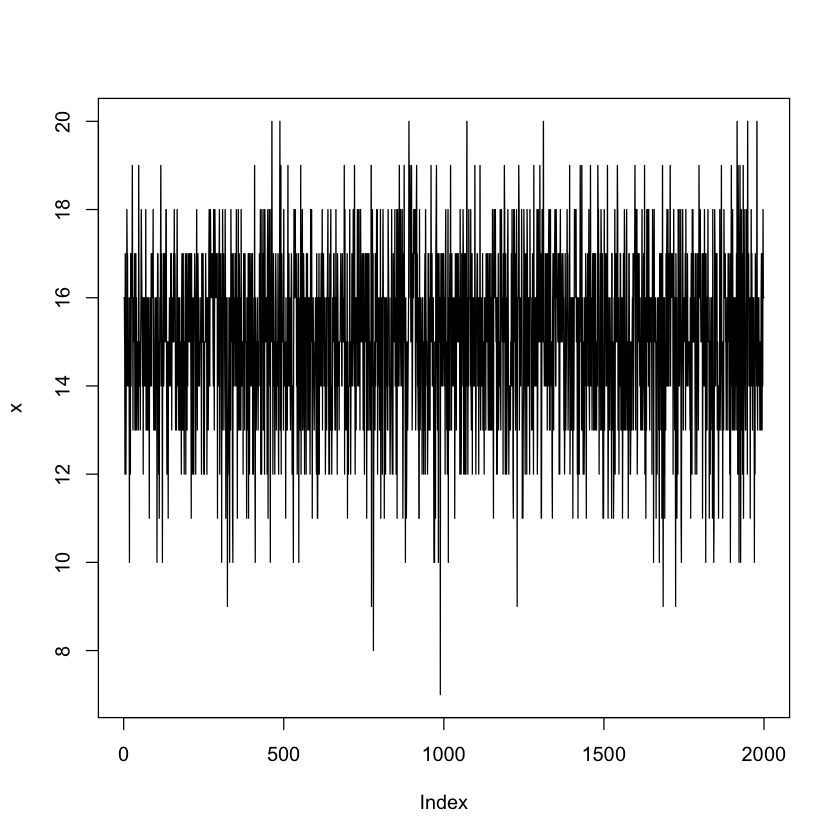

In [34]:
# Queremos generar una muestra numérica que proceda de una distribución binomial
# rbinom(k,n,p) genera k valores aleatorios con esta distribución
# Tened cuidado con el nombre de los argumentos y los parámetros
set.seed(1)
x=rbinom(n=2000,size=20,prob=0.75)
plot(x,type="l")

In [35]:
# Vemos los datos simulados (No. de aciertos en el examen de la asignatura)
x

[1] 16 16 15 12 17 12 12 14 14 18 17 17 14 16 14 15 14 10 16 14 12 17 14 17
  [25] 16 16 19 16 13 16 15 15 15 17 13 14 13 17 14 16 13 14 14 15 15 13 19 15
  [49] 14 14 15 13 15 16 18 17 16 15 14 16 12 16 15 16 14 16 15 14 18 13 16 13
  [73] 16 16 15 13 13 16 14 11 15 14 16 16 14 17 14 17 16 17 16 18 14 13 14 13
  [97] 15 16 13 15 14 16 16 10 14 17 17 15 12 15 11 14 16 15 17 19 14 17 15 14
 [121] 10 15 15 17 14 15 15 17 16 15 15 18 18 14 12 15 15 15 11 15 14 15 16 16
 [145] 14 15 17 14 17 13 15 15 16 15 15 17 15 18 16 17 16 13 15 14 13 16 18 16
 [169] 14 16 14 13 13 16 16 13 14 14 15 12 16 17 13 15 13 17 14 14 12 15 14 16
 [193] 17 12 16 15 17 13 16 14 16 17 15 16 17 15 15 17 16 14 11 17 14 12 13 16
 [217] 14 12 12 16 16 17 16 15 12 15 16 18 15 13 16 17 16 14 16 14 14 15 15 15
 [241] 16 15 12 17 15 17 15 17 15 12 14 12 15 15 15 17 16 15 16 12 15 16 16 13
 [265] 14 17 18 14 14 17 18 17 16 17 16 17 16 17 15 14 18 15 13 16 18 17 16 17
 [289] 17 17 16 17 11 16 15 14 17 17 18 12 14 17 15 15 16 10 17 13 18 16 17 17
 [313] 13 14 16 15 18 16 11 14 14 16 16  9 13 12 13 14 16 14 10 16 16 13 18 16
 [337] 15 17 15 11 10 17 15 16 14 16 15 17 16 14 15 18 14 15 11 16 13 18 13 15
 [361] 17 16 13 16 15 13 18 14 14 15 15 15 12 16 17 15 16 13 17 15 15 15 14 11
 [385] 16 16 13 13 17 11 17 17 12 15 17 16 14 16 16 17 14 17 12 13 12 14 16 14
 [409] 19 12 10 16 14 13 14 15 15 16 14 13 15 15 14 17 16 16 18 12 13 13 12 18
 [433] 16 15 17 13 14 18 15 12 18 16 15 15 16 15 16 12 17 18 11 15 16 17 18 14
 [457] 15 10 15 18 17 15 20 15 16 12 14 17 15 14 15 12 14 16 17 16 13 15 15 14
 [481] 14 17 13 12 15 15 17 20 13 17 19 12 16 17 16 15 15 15 13 18 15 14 14 14
 [505] 15 11 16 13 14 15 13 15 19 14 14 17 14 15 16 14 13 14 16 17 16 12 13 14
 [529] 12 10 15 18 16 16 17 18 16 16 17 14 16 12 14 16 17 17 10 16 15 14 13 15
 [553] 19 12 14 16 17 18 13 13 14 17 16 14 12 14 16 14 16 12 17 15 16 17 13 15
 [577] 14 16 13 14 16 12 14 18 15 15 18 15 11 14 15 16 14 14 13 14 15 15 16 15
 [601] 13 12 17 14 11 11 16 16 12 17 12 16 15 15 14 16 17 16 14 18 13 17 15 17
 [625] 16 14 16 14 15 12 13 16 16 13 15 16 17 18 14 14 12 16 12 17 13 17 18 13
 [649] 14 12 14 13 16 16 15 17 17 15 14 13 16 13 18 14 16 15 12 17 16 14 14 15
 [673] 13 15 15 15 16 17 16 16 14 14 17 15 15 15 16 15 19 12 18 15 13 15 15 15
 [697] 13 17 11 15 12 12 14 14 14 18 15 15 12 14 14 15 17 14 15 15 18 17 15 14
 [721] 19 15 12 14 16 13 16 15 15 18 14 15 14 18 14 16 16 13 18 18 16 15 15 16
 [745] 17 16 15 13 17 14 15 12 15 17 15 17 15 17 11 15 14 17 13 17 17 17 15 14
 [769] 13 14 15 13 19  9 14 15 18 14 17  8 12 14 14 15 13 17 14 16 15 18 17 18
 [793] 12 16 15 14 16 15 13 16 13 18 11 14 16 14 16 12 16 18 16 16 16 11 16 15
 [817] 12 12 16 14 16 15 14 13 13 18 17 16 16 14 14 12 13 14 16 15 18 13 12 15
 [841] 12 17 16 15 15 15 18 14 14 16 12 14 18 11 17 18 16 14 16 16 19 16 14 18
 [865] 18 16 15 14 14 18 15 11 13 17 15 19 16 15 14 10 16 12 11 12 15 14 13 14
 [889] 15 16 20 18 18 19 16 17 15 18 19 17 13 14 16 17 16 18 18 17 18 18 15 13
 [913] 14 18 19 15 17 14 14 13 16 11 11 18 13 13 14 16 15 15 15 12 16 16 14 14
 [937] 12 15 13 16 17 12 18 16 15 15 14 14 12 13 17 17 14 13 15 16 13 17 15 19
 [961] 16 15 17 14 16 16 16 13 10 14 10 15 15 11 17 18 19 15 14 13 17 17 10 16
 [985] 17 15 15 16  7 15 17 15 14 17 17 14 14 16 17 16 15 14 16 12 17 18 15 15
[1009] 13 14 12 15 18 10 16 13 13 16 17 16 19 13 17 13 17 14 15 16 16 14 15 15
[1033] 16 11 14 17 16 15 13 17 16 17 15 15 17 16 15 16 15 12 18 15 15 12 13 17
[1057] 14 16 15 18 17 12 13 17 15 12 16 17 12 15 17 20 14 16 12 15 14 18 16 16
[1081] 16 16 14 18 14 13 15 17 12 16 15 14 16 16 14 14 19 15 14 12 14 16 16 17
[1105] 17 14 16 15 12 16 16 14 19 14 13 15 16 14 16 14 17 13 15 13 14 12 16 15
[1129] 16 16 13 17 16 16 15 17 16 14 13 15 17 16 13 17 13 15 16 16 13 17 13 18
[1153] 14 13 11 16 18 17 17 16 18 16 15 16 12 16 12 16 14 17 13 14 15 15 14 18
[1177] 14 13 17 18 16 16 15 16 12 17 17 15 19 18 14 12 17 14 16 12 13 14 17 18
[1201] 16 14 12 14 14 13 14 13 15 14 17 14 18 16 16 1

In [36]:
# Si quisiéramos saber en cuántos de los 2000 intentos tendríamos un no. de aciertos entre 14 y 16
library(dplyr)
x=as.data.frame(x)
nrow(x %>% filter(x==14|x==15|x==16))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 1097

In [39]:
# Operadores lógicos utilizados en R
help(xor)

**Ejemplo 6 <mark>[distribución binomial bis]</mark>** Debido a las nuevas medidas de protección medioambiental en grandes ciudades, un grupo de agentes de policía procede a revisar el estado de los autobuses de transporte. Se sabe de datos históricos que un 10% de los autobuses generan una mayor cantidad de humo de la permitida. En cada jornada los agentes revisan siempre 18 autobuses, asumimos que el estado de un autobus es independiente del estado de los otros autobuses.

1. Calcular la probabilidad de que se encuentren exactamente 2 autobuses que generan una mayor cantidad de humo de la permitida.


2. Calcular la probabilidad de que el número de autobuses que sobrepasan el límite de generación de gases sea al menos 4.


3. Calcular la probabilidad de que tres o menos autobuses emitan gases por encima de lo permitido en la norma.


4. Representar gráficamente la función de masa de probabilidad y la función de distribución.


5. Generar una muestra procedente de una distribución Binominal (n=18,p=0.1) con tamaño 100 y calcular las frecuencias relativas y compararlas con las probabilidades teóricas.

**Solución 6**

1. Aquí se tiene una distribucion Binominal (n=18,p=0.1) y se desea calcular $P(X=2)$. Para obtener esta probabilidad se usa la siguiente función

In [40]:
# P(X=2)
dbinom(x=2, size=18, prob=0.10)

[1] 0.2835121

2. En este caso interesa calcular $P(X \geqslant 4)$, para obtener esta probabilidad se usa la siguiente función

In [41]:
# P(X>=4)
sum(dbinom(x=4:18, size=18, prob=0.10))

[1] 0.09819684

In [42]:
# P(X>4)
(1-pbinom(q=4, size=18, prob=0.10))+dbinom(x=4, size=18, prob=0.10)

[1] 0.09819684

3. En este caso interesa $P(X\leqslant 3)$, lo cual es $F(X=3)$, por lo tanto, la instrucción para obtener esta probabilidad es

In [43]:
pbinom(q=3, size=18, prob=0.10)

[1] 0.9018032

4. Para dibujar la función de masa de probabilidad para una Binominal (n=18,p=0.1) se usa la siguiente función

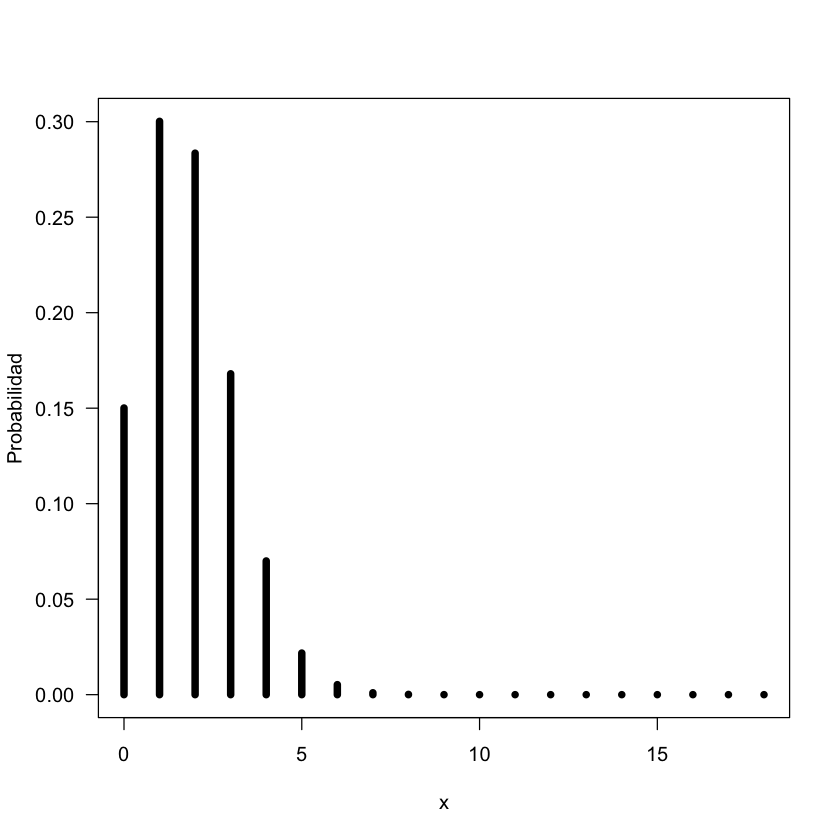

In [44]:
x = 0:18  
Probabilidad = dbinom(x=x, size=18, prob=0.1)
plot(x=x, y=Probabilidad, type='h', las=1, lwd=6)

**<u>Interpretación resultados</u>.-** En la imagen se muestra la función de masa de probabilidad para la Binominal (n=18,p=0.1), de esta figura se observa claramente que la mayor parte de la probabilidad está concentrada para valores pequeños de $x$. Es decir, la probabilidad de que haya más de 6-7 autobuses que emitan gases por encima de lo permitido en la norma es prácticamente nula.

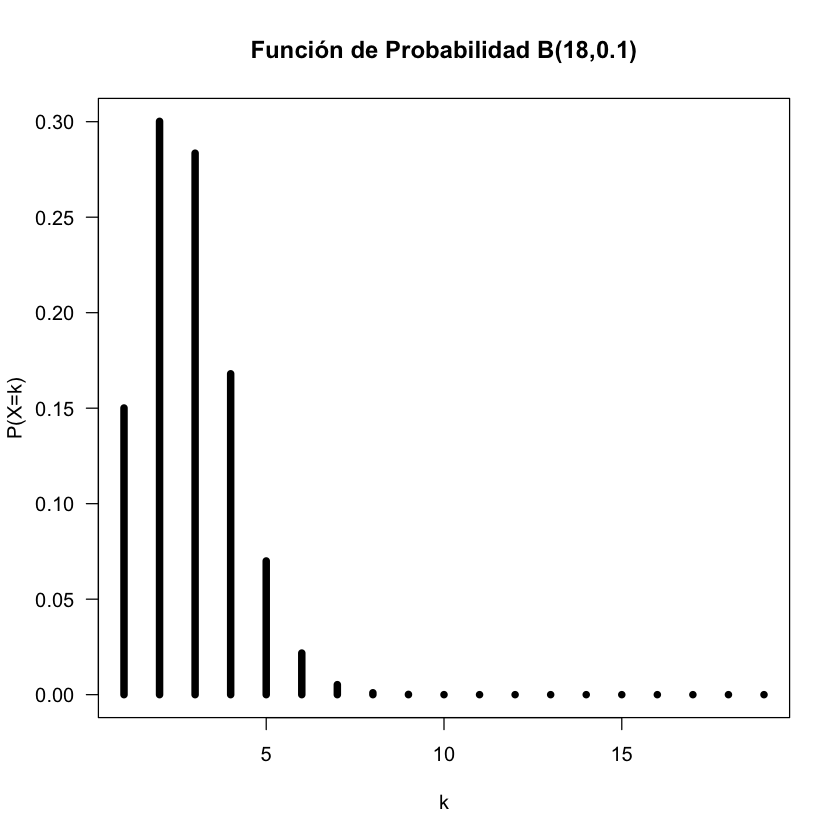

In [45]:
# Otra alternativa para representar ese mismo gráfico
plot(dbinom(0:18,18,0.1),type="h",xlab="k",ylab="P(X=k)",main="Función de Probabilidad B(18,0.1)",las=1, lwd=6)

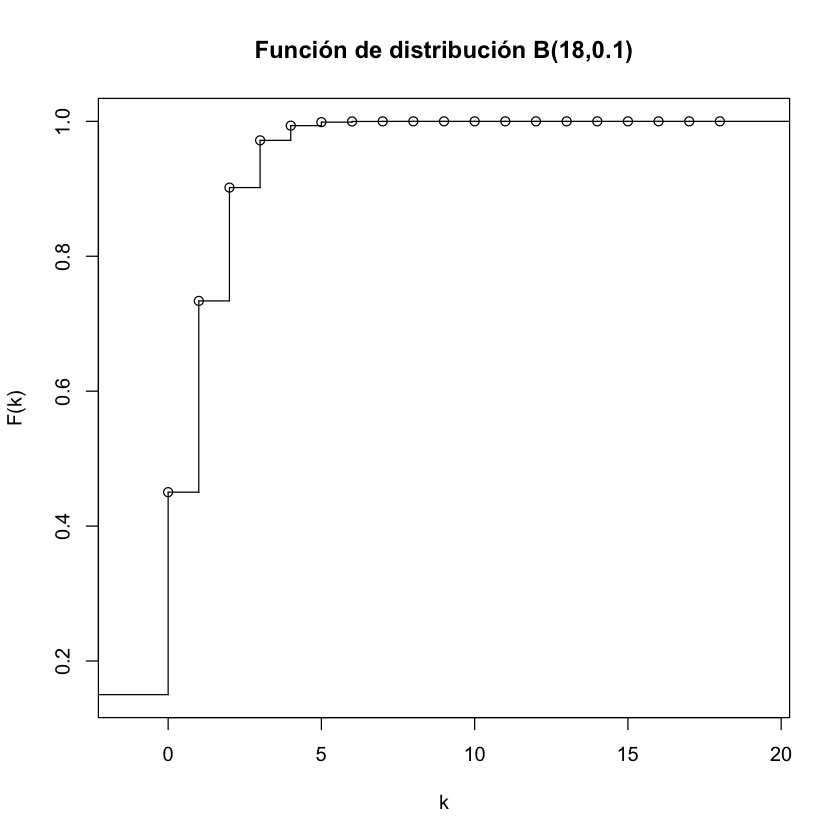

In [46]:
# También podemos representar su función de distribución
plot(stepfun(0:18,pbinom(0:19,18,0.1)),xlab="k",ylab="F(k)",main="Función de distribución B(18,0.1)")

**<u>Interpretación resultados</u>.-** Se puede observar que la probabilidad de que detectemos en un lote de 18 autobuses más de 6 defectuosos es nula ya que el incremento es igual a 0. En cambio, tenemos un 75% de probabilidad de que nos encontremos 3 o menos autobuses defectuosos en cada lote.

5. La muestra aleatoria se obtiene con la función $\tt rbinom$ y los resultados se almacenan en el objeto $\tt x$ y por último, se construye la tabla de frecuencias relativas de la muestra analizada.

In [49]:
# Generamos la secuencia de valores numéricos
set.seed(1)
x=rbinom(n=100, size=18, prob=0.1)
x  

[1] 1 1 2 4 1 3 4 2 2 0 1 1 2 1 3 2 2 5 1 3 4 1 2 0 1 1 0 1 3 1 2 2 2 1 3 2 3
 [38] 0 2 1 3 2 3 2 2 3 0 2 2 2 2 3 1 1 0 0 1 2 2 1 4 1 2 1 2 1 2 3 0 3 1 3 1 1
 [75] 2 3 3 1 3 4 1 2 1 1 3 1 2 0 1 0 1 0 2 3 3 3 2 1 3 2

In [50]:
prop.table(table(x))  # Tabla de frecuencia relativa

x
   0    1    2    3    4    5 
0.11 0.32 0.30 0.21 0.05 0.01 

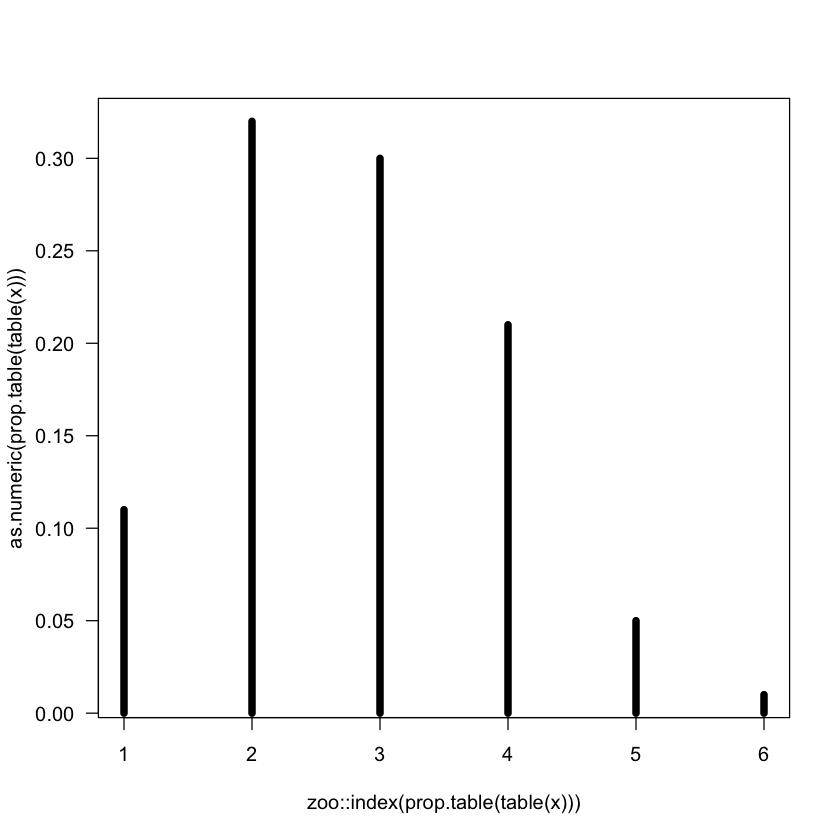

In [52]:
plot(x=zoo::index(prop.table(table(x))), y=as.numeric(prop.table(table(x))), type='h', las=1, lwd=6)

**<u>Interpretación resultados</u>.-** A pesar de ser una muestra aleatoria de sólo 100 observaciones, se observa que las frecuencias relativas obtenidas son muy cercanas a las mostradas en la imagen anterior. 

In [54]:
# Generamos una serie de valores numéricos mayor (n=10000)
x=rbinom(10000, 18, 0.1)

In [55]:
# Obtenemos la frecuencia absoluta
freqAbs=table(x)
freqAbs

x
   0    1    2    3    4    5    6    7    8 
1493 2982 2899 1621  725  217   54    8    1 

In [56]:
# Obtenemos la frecuencia relativa
freqRel=prop.table(freqAbs)
freqRel

x
     0      1      2      3      4      5      6      7      8 
0.1493 0.2982 0.2899 0.1621 0.0725 0.0217 0.0054 0.0008 0.0001 

**<u>Interpretación resultados</u>.-** Vemos como simulando una muestra muy grande de esta distribución (por ejemplo, 10.000 valores), las frecuencias relativas son muy similares a las probabilidades teóricas.

In [57]:
# Vamos a comparar las frecuencias relativas y las probabilidades teóricas
# Generamos primero un dataframe con la tabla de probabilidades teóricas
probsTeo=data.frame(x=0:8,Prob=dbinom(0:8,18,0.1))
probsTeo

x,Prob
<int>,<dbl>
0,0.1500946353
1,0.3001892706
2,0.2835120889
3,0.1680071638
4,0.0700029849
5,0.0217787064
6,0.0052430219
7,0.0009986708
8,0.0001525747


**Nota.** Para presentar en una única tabla las probabilidades teóricas y las frecuencias relativas de nuesta simulación, podemos utilizar la función `merge`. Esta función combina `data.frames` que tengan un campo en común (en este caso el valor de la variable $x$). 

In [59]:
# El objeto probsTeo es obviamente un data.frame
class(probsTeo)

[1] "data.frame"

In [58]:
# Podemos comprobar que freqRel es un objeto de clase 'table'
class(freqRel)

[1] "table"

In [60]:
# Para poder combinarlo con probsTeo hemos de convertirlo primero en data.frame
freqRel=as.data.frame(freqRel)

# Vemos que la variable x es de tipo factor
str(freqRel)

'data.frame':	9 obs. of  2 variables:
 $ x   : Factor w/ 9 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9
 $ Freq: num  0.1493 0.2982 0.2899 0.1621 0.0725 ...


**Nota.** Para poder combinar el data.frame con $\tt probsTeo$ hemos de convertir $x$ a la clase 'integer' (ya que en ese data.frame, $x$ es un 'integer', como puede comprobarse mediante str(probsTeo)):

In [61]:
# Estructura del elemento probsTeo
str(probsTeo)

'data.frame':	9 obs. of  2 variables:
 $ x   : int  0 1 2 3 4 5 6 7 8
 $ Prob: num  0.15 0.3 0.284 0.168 0.07 ...


In [62]:
# Modificacmos la variable x
freqRel$x=as.integer(as.character(freqRel$x))
str(freqRel)

'data.frame':	9 obs. of  2 variables:
 $ x   : int  0 1 2 3 4 5 6 7 8
 $ Freq: num  0.1493 0.2982 0.2899 0.1621 0.0725 ...


In [63]:
# Por último procedemos a combinar ambos objetos mediante la función `merge` y mostramos el resultado
compara=merge(freqRel,probsTeo,all=TRUE)
compara

x,Freq,Prob
<int>,<dbl>,<dbl>
0,0.1493,0.1500946353
1,0.2982,0.3001892706
2,0.2899,0.2835120889
3,0.1621,0.1680071638
4,0.0725,0.0700029849
5,0.0217,0.0217787064
6,0.0054,0.0052430219
7,0.0008,0.0009986708
8,0.0001,0.0001525747


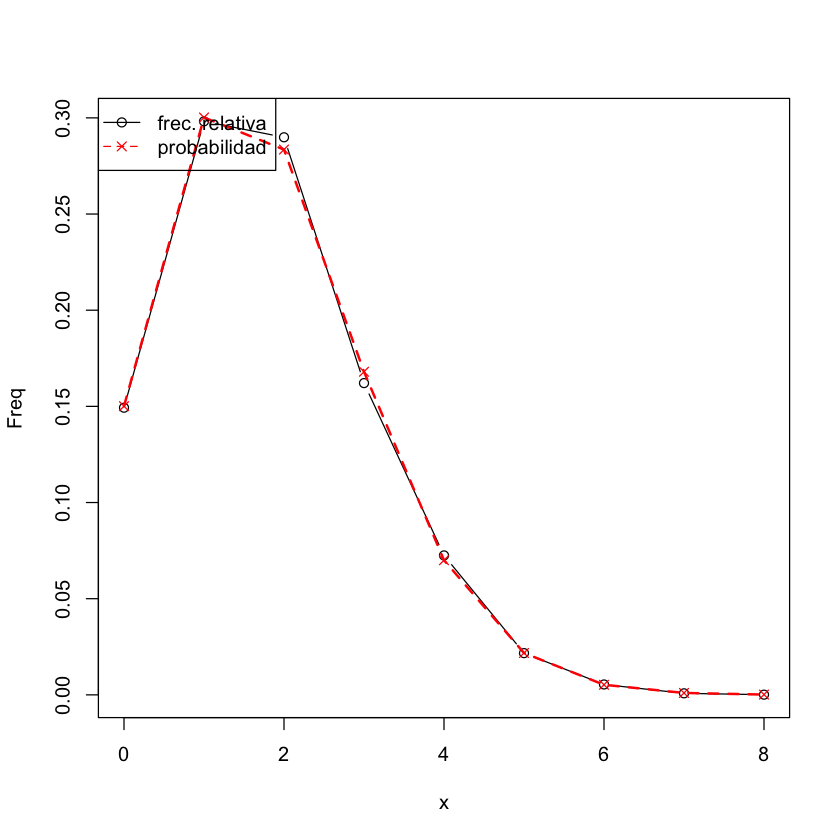

In [65]:
# Podemos hacer un gráfico que nos muestre la comparación entre probabilidad teórica y frecuencia relativa
with(compara,{
  plot(x,Freq, type="b")
  points(x,Prob,col="red",pch=4)
  lines(x,Prob,col="red",lty=2,lwd=2)
  legend("topleft",c("frec. relativa","probabilidad"),col=c("black","red"),lty=1:2,pch=c(1,4))
})

## 2.3 Distribución geométrica $(p)$

La **distribución geométrica** permite calcular la `probabilidad p de que tenga que realizarse un número k de repeticiones antes de obtener un éxito por primera vez`. Esta probabilidad decrece a medida que aumenta k con lo que la función de masa de probabilidad es siempre decreciente. 

**Ejemplo 7 <mark>[distribución geométrica]</mark>** El número de hijos hasta el nacimiento de la primera niña o el no. de intentos fallidos en la aplicación de la vacuna del COVID-19 antes del primer éxito.

**Ejemplo 8 <mark>[distribución geométrica bis]</mark>** La probabilidad de que cierto examen médico dé lugar a una reacción “positiva” es igual a 0,8, ¿cuál es la probabilidad de que ocurran menos de 5 reacciones “negativas” antes de la primera positiva? 

**Solución 8** La variable aleatoria “número de reacciones negativas antes de la primera positiva” sigue una distribución geométrica con parámetro p = 0,8.

In [ ]:
# Queremos calcular la función de distribución acumulada (X<=4)
# P(X≤k)=pbinom(k,p)
pgeom(4,0.8)

**<u>Interpretación resultados</u>.-** La probabilidad de que ocurran menos de 5 reacciones "negativas" antes de la primera positiva es casi de *1 (0.9997)*.

In [66]:
# y ahora queremos calcular la probabilidad de que ocurran 4 reacciones negativas (función de masa para X=4)
# P(X=k)=dgeom(k,p)
dgeom(4,0.8)

[1] 0.00128

In [67]:
# Queremos calcular la función de distribución acumulada (X>4)
1-pgeom(4,0.8)

[1] 0.00032

## 2.4 Distribución hipergeométrica $(N,R,n)$

La **distribución hipergeométrica** suele aparecer en procesos muestrales sin reemplazo, en los que se investiga la presencia o ausencia de cierta característica. Esta distribución se puede ilustrar del modo siguiente: `se tiene una población finita con N elementos, de los cuales R tienen una determinada característica que se llama “éxito” (diabetes, obesidad, hábito de fumar, etc.). El número de “éxitos” en una muestra aleatoria de tamaño n, extraída sin reemplazo de la población`, es una variable aleatoria con distribución hipergeométrica de parámetros N, R y n.

**Ejemplo 9 <mark>[distribución hipergeométrica]</mark>** Pensar, por ejemplo, en un procedimiento de control de calidad en una empresa farmacéutica, durante el cual se extraen muestras de las cápsulas fabricadas y se someten a análisis para determinar su composición. Durante las pruebas, las cápsulas son destruidas y no pueden ser devueltas al lote del que provienen. En esta situación, la variable que cuenta el número de cápsulas que no cumplen los criterios de calidad establecidos sigue una distribución hipergeométrica. 


**Ejemplo 10 <mark>[distribución hipergeométrica bis]</mark>** Se sabe que el $7\%$ de los materiales quirúrgicos en un lote de $N=100$ no cumplen ciertas especificaciones de calidad. Tomada una muestra al azar de $10$ unidades sin reemplazo, interesa conocer la probabilidad de que no más de dos sean defectuosas.

**Solución 10** El número de materiales quirúrgicos defectuosos en el lote es $R = 0,07*100 = 7$. Para un tamaño muestral de $n=10$, la probabilidad buscada es P (número de defectuosos) $\leqslant 2$.

In [70]:
# Queremos calcular la función de distribución acumulada (X<=2)
# q=número de útiles defectuosos buscado X<=2. Estamos aplicando 1-P(X>8).  
# m=número de útiles en el lote NO defectuosos 
# n=número de útiles defectuosos en el lote 
# k=tamaño de la muestra 
1-phyper(q=7,m=93,n=7,k=10) # Hay que restar 1 en q ya que lo han programado así

[1] 0.9792397

**<u>Interpretación resultados</u>.-** La probabilidad de que, a lo sumo, haya 2 materiales quirúrgicos defectuosos en el lote es igual al *98%* aprox.

In [71]:
# Queremos calcular la función de masa para X=2 (OJOO!!)
# x=mínimo número de útiles que queremos sacar de la muestra NO defectuosos
dhyper(x=8,m=93,n=7,k=10)

[1] 0.1235489

## 2.5 Distribución de Poisson $(\lambda)$

La **distribución de Poisson** debe su nombre al matemático francés Simeón Denis Poisson (1781-1840), aunque ya había sido introducida en 1718 por Abraham De Moivre (1667-1754) como una forma límite de la distribución binomial que surge cuando se observa un evento raro después de un número grande de repeticiones. La distribución de Poisson surge cuando un evento o suceso “raro” ocurre aleatoriamente en el espacio o el tiempo. La `variable asociada es el número de ocurrencias del evento en un intervalo o espacio continuo`, por tanto, es una variable aleatoria discreta que toma valores enteros de 0 en adelante (0, 1, 2,...). En general, la distribución de Poisson de parámetro $\lambda$ se puede utilizar como una aproximación de la binomial, si el número de pruebas $n$ es grande, pero la probabilidad de éxito $p$ es pequeña, siendo $\lambda=np$; podemos considerar que la aproximación Poisson-binomial es “buena” si $n \geqslant 20$ y $p \leqslant 0.05$ y “muy buena” si $n \geqslant 100$ y $p \leqslant 0,01$.

**Ejemplo 11 <mark>[distribución poisson]</mark>** El número de pacientes que llegan a una consulta médica en un periodo de tiempo dado, o el número de llamadas que recibe un servicio de atención a urgencias durante 1 hora, o el número de células cancerígenas en una superficie histológica o el número de glóbulos blancos en un milímetro cúbico de sangre son ejemplos de variables que siguen una distribución de Poisson. En general, es una distribución muy utilizada en diversas áreas de la investigación médica y, en particular, en epidemiología.

**Ejemplo 12 <mark>[distribución poisson]</mark>** El número de enfermos que solicitan atención de urgencia en un hospital durante un periodo de 24 horas tiene una media de 43,2 pacientes. Se sabe que el servicio se colapsará si el número de enfermos excede de 50. ¿Cuál es la probabilidad de que se colapse el servicio de urgencias del hospital? Representar la función de masa de probabilidad.

In [75]:
# Queremos calcular la función de distribución acumulada (X>50)
1-ppois(50,43.2)

[1] 0.134332

**<u>Interpretación resultados</u>.-** La probabilidad de que el servicio de urgencia de dicho hospital colapse está cerca del $13\%$ de probabilidad.

In [76]:
# Queremos calcular la función de masa para X=50
# P(X=k)=dpois(k,lambda)
dpois(50,43.2)

[1] 0.03385251

In [77]:
# Queremos calcular la función de distribución acumulada (X<=50)
# P(X≤k)=ppois(k,lambda)
ppois(50,43.2)

[1] 0.865668

# 3. Las principales distribuciones de probabilidad continuas <a id="topic3"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este caso, la librería $\tt stats$ de R sabe calcular cuatro funciones para las <u>distribuciones de probabilidad continuas</u>, que se obtienen añadiendo un prefijo al nombre de la distribución como vimoos para el caso discreto:

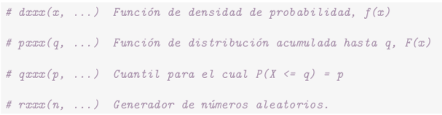

En el lugar de las letras ***xxx*** se debe de introducir el nombre de la distribución de probabilidad en la que estemos interesados. Os dejo por aquí un listado de las principales distribuciones de probabilidad continuas, con los valores que toman, los parámetros que las caracteriza, los campos de variación y algunas observaciones. 

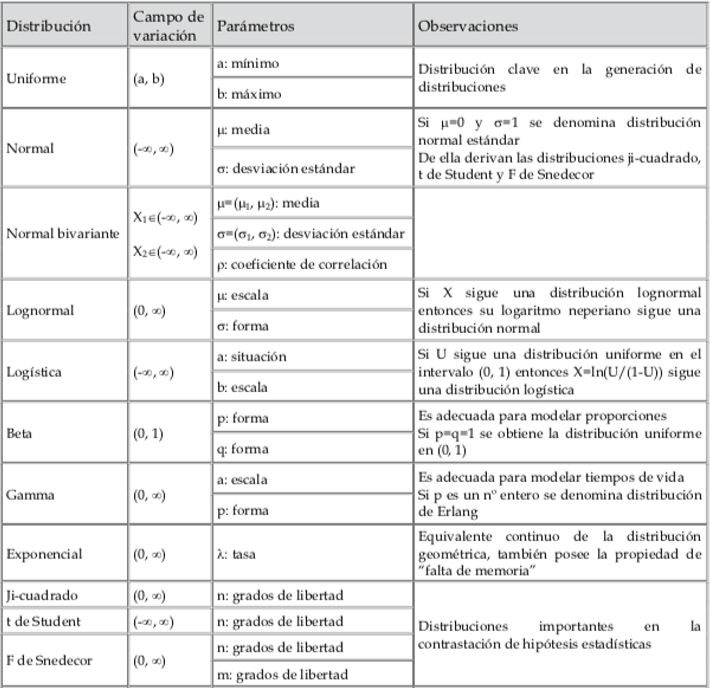

El listado de nombres disponibles para las **5 distribuciones continuas básicas** sería el siguiente:

+ $\tt norm$      # Normal
+ $\tt lnorm$     # LogNormal
+ $\tt beta$      # Beta
+ $\tt gamma$     # Gamma
+ $\tt exp$       # Exponencial

**Ejemplo 13 <mark>[funciones de R para distribuciones continuas]</mark>** Para la distribución normal, la función de densidad se obtiene como $\tt dnorm()$, la función de distribución como $\tt pnorm()$ y se pueden generar valores aleatorios con distribución normal mediante $\tt rnorm()$. La **única diferencia** con el caso de las distribuciones discretas es que ahora en lugar de la función de masa tenemos la de densidad. Veamos cada una de ellas.

## 3.1 Distribución normal $(\mu,\sigma)$

La **distribución normal** es, sin duda, la distribución de probabilidad más importante del cálculo de probabilidades y de la estadística. Fue descubierta, como aproximación de la distribución binomial, por Abraham De Moivre (1667-1754) y publicada en 1733 en su libro The Doctrine of Chances. Estos resultados fueron ampliados por Pierre-Simon Laplace (1749- 1827), quién también realizó aportaciones importantes. En 1809, Carl Friedrich Gauss (1777- 1855) publicó un libro sobre el movimiento de los cuerpos celestes donde asumía errores normales, por este motivo esta distribución también es conocida como distribución Gaussiana.

La importancia de la distribución normal queda totalmente consolidada por ser la distribución límite de numerosas variables aleatorias, discretas y continuas, como se demuestra a través del teorema central del límite. Las consecuencias de estos teoremas implican la casi universal presencia de la distribución normal en todos los campos de las ciencias experimentales (física, química y biología), ciencias de la salud (medicina, farmacia) y ciencias sociales (psicología, economía, etc). 

La `distribución normal queda totalmente definida mediante dos parámetros: la media` $(\mu)$ `y la desviación estándar o desviación típica` $(\sigma)$. Su función de densidad es simétrica respecto a la media y la desviación estándar nos indica el mayor o menor grado de apertura de la curva que, por su aspecto, se suele llamar campana de Gauss. Cuando la distribución normal tiene como parámetros $\mu = 0$ y $\sigma = 1$ recibe el nombre de distribución normal estándar.

**Ejemplo 14 <mark>[distribución normal]</mark>** Se supone que el nivel de colesterol de los enfermos de un hospital sigue una distribución normal con una media de 179,1 mg/dL y una desviación estándar de 28,2 mg/dL.

1. ¿Cuál es el porcentaje de enfermos con un nivel de colesterol inferior a 169 mg/dL?

2. Representar gráficamente la función de densidad.

**Solución 14**

1. En este primer caso, nos están preguntando por el porcentaje de enfermos con un nivel de colesterol inferior a 169 mg/dL. Es decir, tendremos que calcular la siguiente función de distribución:

In [78]:
# Queremos calcular la función de distribución acumulada (X<=169)
# P(X≤k)=pnorm(k,mu,sigma)
pnorm(169,179.1,28.2)

[1] 0.3601133

**<u>Interpretación resultados</u>.-** Luego, el porcentaje de enfermos con un nivel de colesterol inferior a 169 mg/dL es igual al $36\%$.

2. Por último, nos piden que representemos la función de densidad. Para ello tendremos que ejecutar el siguiente código:

In [79]:
# Primero generamos una muestra procedente de dicha distribución
set.seed(1)
x=rnorm(10,179.1,28.2)
x

[1] 161.4340 184.2787 155.5353 224.0869 188.3921 155.9628 192.8455 199.9208
 [9] 195.3370 170.4880

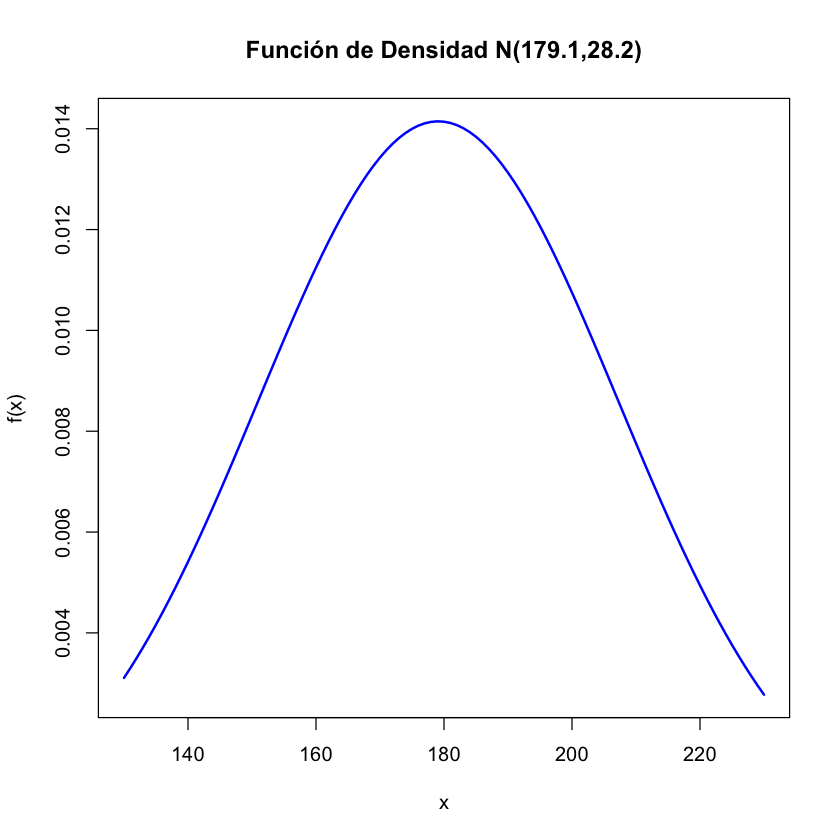

In [80]:
# Segundo representamos gráficamente la función de densidad
curve(dnorm(x,179.1,28.2),xlim=c(130,230),col="blue",lwd=2,xlab="x",ylab="f(x)",main="Función de Densidad N(179.1,28.2)")

**Nota.** Las funciones de densidad y distribución de una variable aleatoria se **tienen que dibujar con la función** $\tt curve$ como habéis visto. Veamos otro caso para ilustrarlas. 

**Ejemplo 15 <mark>[distribución normal]</mark>** Supongamos ahora que tenemos una cierta variable $x≈N(170,12)$. Entonces:

In [81]:
# Podemos calcular su función de densidad para k=178 por ejemplo, f(178):
dnorm(178,170,12)

[1] 0.02662067

In [82]:
# Podemos calcular fácilmente los valores de la función de densidad sobre una secuencia de valores de k
x=rnorm(10,170,12); x
dnorm(x,170,12)

[1] 188.1414 174.6781 162.5451 143.4236 183.4992 169.4608 169.8057 181.3260
 [9] 179.8547 177.1268

[1] 0.010603339 0.030812524 0.027410884 0.002861833 0.017657759 0.033211645
 [7] 0.033240833 0.021295520 0.023729238 0.027869996

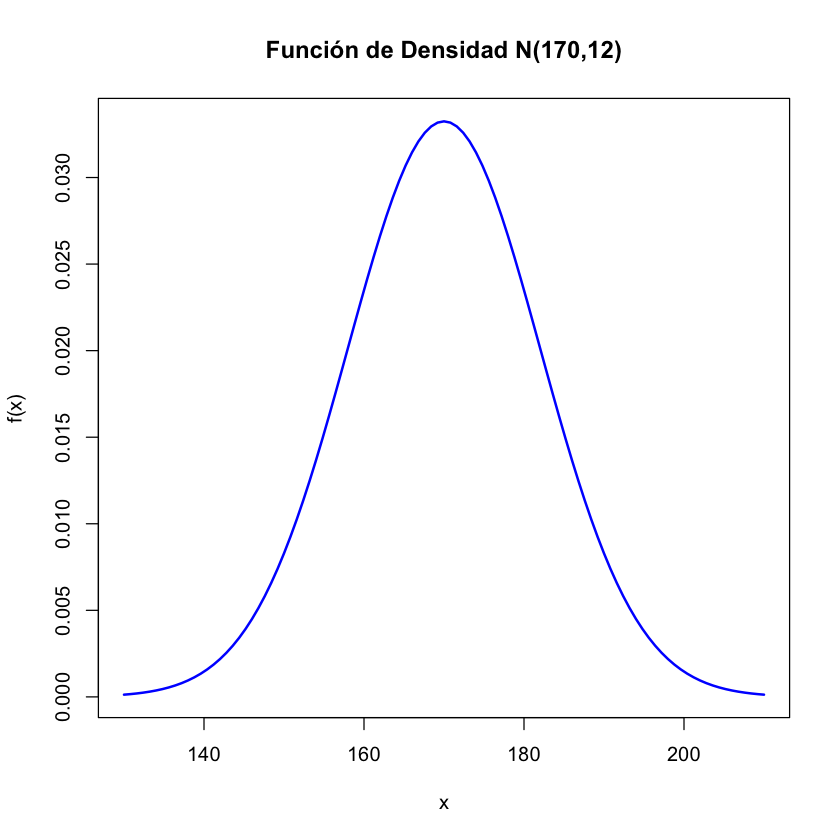

In [83]:
# La representación gráfica de la función de densidad se obtiene fácilmente como:
curve(dnorm(x,170,12),xlim=c(130,210),col="blue",lwd=2,xlab="x",ylab="f(x)",main="Función de Densidad N(170,12)")

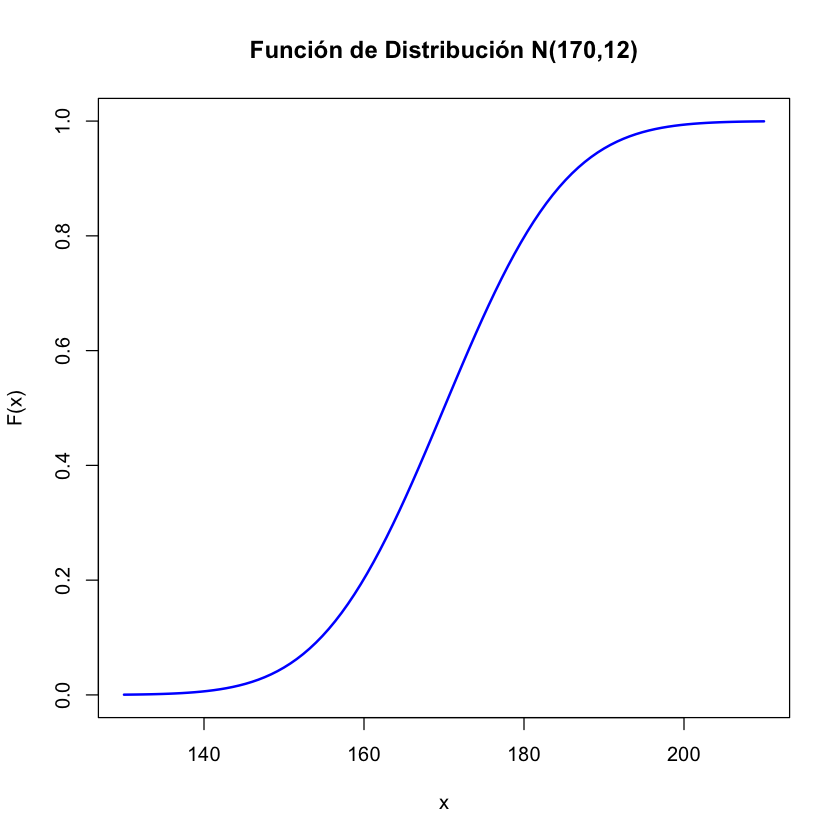

In [84]:
# También podemos representar la función de distribución
curve(pnorm(x,170,12),xlim=c(130,210),col="blue",lwd=2,xlab="x",ylab="F(x)",main="Función de Distribución N(170,12)")

In [85]:
# Calculamos la probabilidad P(X≤180)
pnorm(180,170,12)

[1] 0.7976716

In [86]:
# Calculamos la probabilidad P(X>168)
1-pnorm(168,170,12)

# Equivalentemente
pnorm(168,170,12, lower.tail=FALSE)

[1] 0.5661838

[1] 0.5661838

In [87]:
# Calculamos la probabilidad P(150≤X≤168)
pnorm(168,170,12)-pnorm(150,170,12)

[1] 0.3860258

**Nota.** Para aquellos que os interese, no es demasiado difícil <u>representar el área correspondiente a la probabilidad</u> que se acaba de calcular:

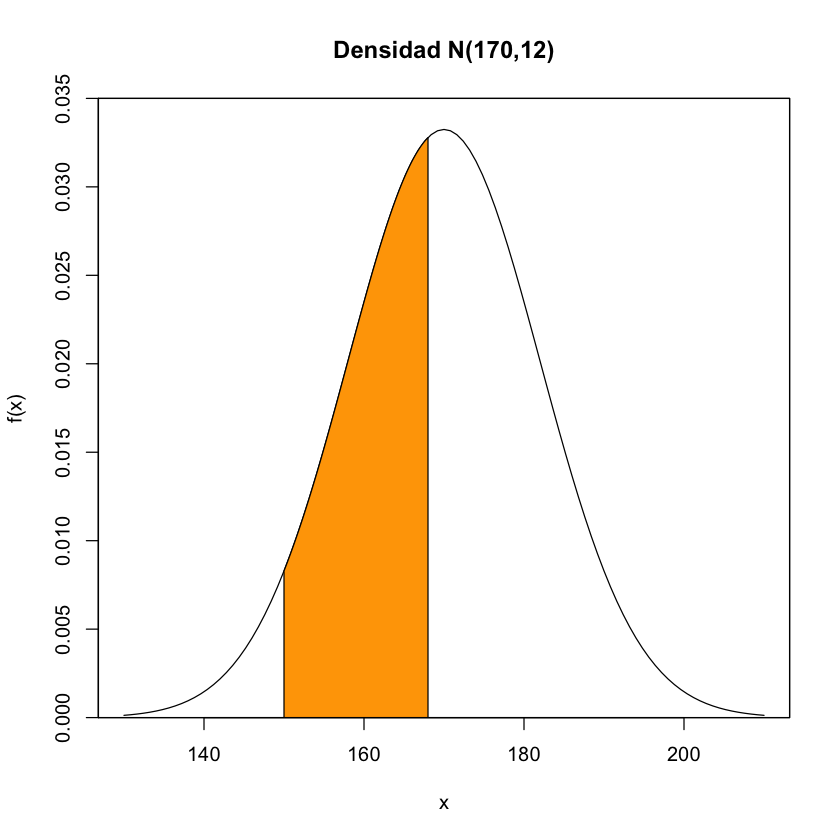

In [88]:
regionX=seq(150,168,0.01)            # Intervalo a sombrear
xP <- c(150,regionX,168)             # Base de los polígonos que crean el efecto "sombra"
yP <- c(0,dnorm(regionX,170,12),0)   # Altura de los polígonos sombreados
curve(dnorm(x,170,12),xlim=c(130,210),yaxs="i",ylim=c(0,0.035),ylab="f(x)",main='Densidad N(170,12)') 
polygon(xP,yP,col="orange1")
box()

**Nota.** Podemos <u>simular una muestra</u> grande de la distribución normal anterior y comprobar que el histograma es muy parecido a la función de densidad. Esto nos sirve para confirmar que estamos realizando correctamente el procedimiento de obtener una muestra de la distribución normal.

In [91]:
# Generamos la muestra
set.seed(1)
x=rnorm(10000, 170, 12)

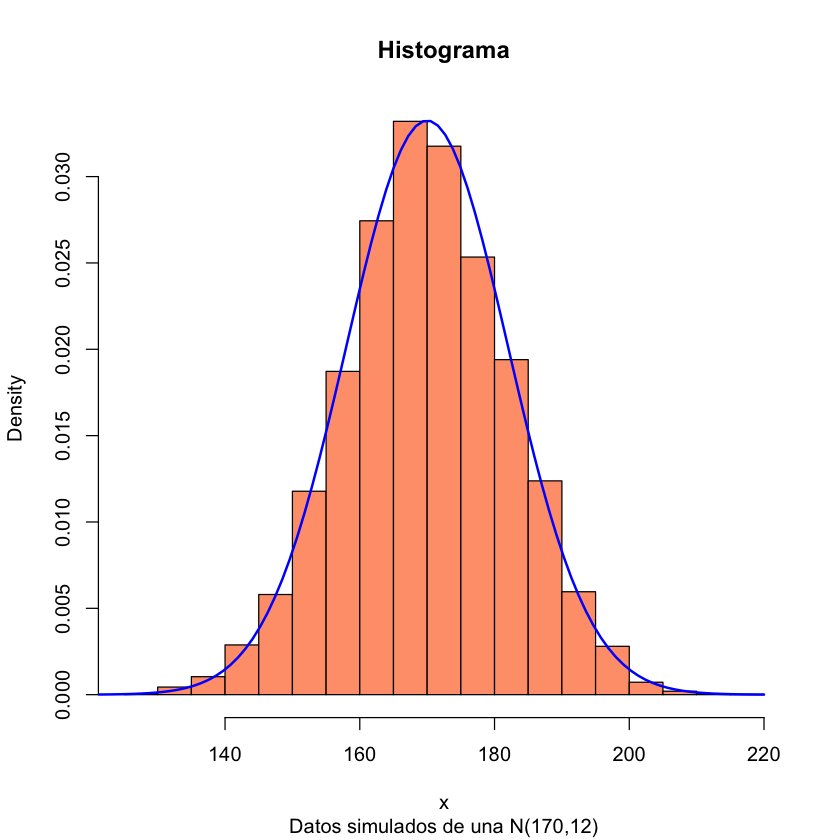

In [95]:
# Obtenemos su histograma
hist(x,freq=FALSE,col="lightsalmon",main="Histograma",sub="Datos simulados de una N(170,12)")

# Obtenemos su curva de densidad o función de densidad (Hay que escribirlo en esta misma celda junto al plot)
curve(dnorm(x,170,12),xlim=c(110,220),col="blue",lwd=2,add=TRUE)

**Nota.** Podemos comprobar también que la distribución acumulativa empírica de esta simulación es muy similar a la función de distribución teórica ($\tt ecdf$) de la distribución normal empleada:

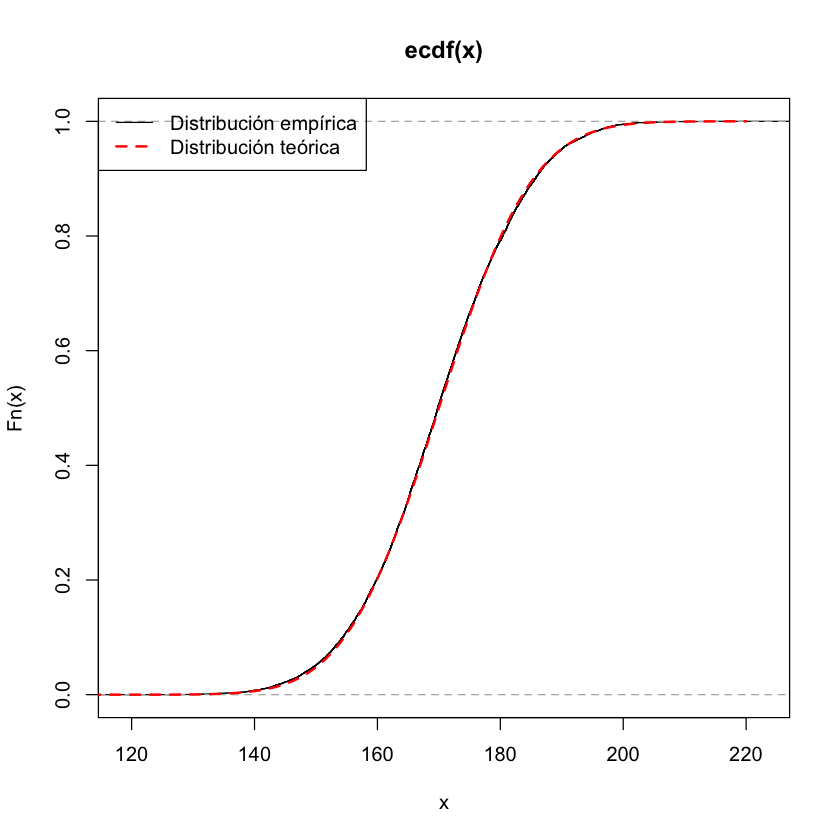

In [98]:
# Obtenemos la función de distribución teórica
plot(ecdf(x))

# Obtenemos la función de distribución empírica (Hay que escribirlo en esta misma celda junto al plot)
curve(pnorm(x,170,12),xlim=c(110,220),col="red",lwd=2,lty=2,add=TRUE)

# Modificamos parámetros del gráfico (Hay que escribirlo en esta misma celda junto al plot)
legend("topleft",lty=c(1,2),lwd=c(1,2),col=c("black","red"),legend=c("Distribución empírica","Distribución teórica"))

## 3.2 Distribución log normal $(\mu,\sigma)$

La `variable resultante de aplicar la función exponencial a una variable que se distribuye normal con media` $\mu$ `y desviación estándar` $\sigma$, sigue una **distribución lognormal** con parámetros $\mu$ (escala) y $\sigma$ (forma). Dicho de otro modo, si una variable x sigue una distribución lognormal entonces la variable $ln(x)$ se distribuye normalmente. Esta variable aleatoria fue propuesta por Francis Galton (1822-1911) en 1879, como consecuencia del estudio de la media geométrica de n variables aleatorias independientes.

**Ejemplo 16 <mark>[distribución log normal]</mark>** La distribución lognormal es útil para modelar datos de numerosos ámbitos como, por ejemplo, en medicina, el período de incubación de una enfermedad, los títulos de anticuerpo a un virus, el tiempo de supervivencia en pacientes con cáncer o SIDA, el tiempo hasta la seroconversión de VIH+, etc.

**Ejemplo 17 <mark>[distribución log normal bis]</mark>** Supóngase que la supervivencia, en años, de una intervención quirúrgica (tiempo que pasa hasta que ocurre la muerte del enfermo) en una cierta población sigue una distribución lognormal de parámetro de escala $2.32$ y de forma $0.20$. Calcular la probabilidad de supervivencia a los 12 años y la media de años de supervivencia de un paciente tras una intervención quirúrgica.

In [99]:
# Nos están pidiendo que calculemos P(X>12)
1-plnorm(12,2.32,0.2)

# Equivalentemente
plnorm(12,2.32,0.2, lower.tail=FALSE)

[1] 0.2048183

[1] 0.2048183

**<u>Interpretación resultados</u>.-** La probabilidad de supervivencia a los 12 años es próximo al $20\%$. Para responder a la 2º pregunta antes tenemos que obtener una muestra.

In [100]:
set.seed(1)
x=rlnorm(1000,2.32,0.2)
mean(x)

[1] 10.3713

**<u>Interpretación resultados</u>.-** A la vista de los resultados también se puede decir que el número medio de años de supervivencia de un paciente tras una intervención quirúrgica es de, aproximadamente, 10 años y medio.

## 3.3 Distribución beta $(p,q)$

La **distribución beta** es adecuada para `variables aleatorias continuas que toman valores en el intervalo (0,1)`, lo que la hace muy apropiada para modelar proporciones siendo los valores de los parámetros p y q. Un caso particular de la distribución beta es la distribución uniforme en $(0,1)$, que se corresponde con una beta de parámetros p = 1 y q = 1.


**Ejemplo 18 <mark>[distribución beta]</mark>** En el presupuesto familiar, la porción que se dedica a salud sigue una distribución beta(2,2).

1. ¿Cuál es la probabilidad de que se gaste más del 25% del presupuesto familiar en salud?


2. ¿Cuál será el porcentaje medio que las familias dedican a la compra de productos y servicios de salud?

**Solución 18**

1. Teniendo en cuenta la distribución beta, la probabilidad de que se gaste más de la cuarta parte del presupuesto en salud será 0,84.

In [101]:
# Nos están pidiendo que calculemos P(X>0,25)
1-pbeta(0.25,2,2)

# Equivalentemente
pbeta(0.25,2,2, lower.tail=FALSE)

[1] 0.84375

[1] 0.84375

2. Por otro lado, el porcentaje medio que las familias dedican a la compra de productos y servicios de salud será el 50%. Para responder a esta pregunta hemos tenido tenemos que obtener una muestra previamente como siempre.

In [102]:
set.seed(1)
x=rbeta(1000,2,2)
mean(x)

[1] 0.5011532

## 3.4 Distribución gamma $(a,p)$

La **distribución gamma** se puede caracterizar del modo siguiente. Si se está interesado en la ocurrencia de un evento generado por un proceso de Poisson de media $\lambda$, `la variable que mide el tiempo transcurrido hasta obtener n ocurrencias del evento` sigue una distribución gamma con parámetros $a = n*\lambda$ (escala) y $p = n$ (forma).

**Ejemplo 19 <mark>[distribución gamma]</mark>** La distribución gamma aparece cuando se realiza el estudio de la duración de elementos físicos (tiempo de vida). Cuando p es un número entero positivo se tiene un caso particular de la distribución gamma que se denomina distribución de Erlang.

**Ejemplo 20 <mark>[distribución gamma bis]</mark>** El número de pacientes que llegan a la consulta de un médico sigue una distribución de Poisson de media 3 pacientes por hora. Calcular la probabilidad de que transcurra menos de una hora hasta la llegada del segundo paciente. Debe tenerse en cuenta que la variable aleatoria “tiempo que transcurre hasta la llegada del segundo paciente” sigue una distribución Gamma (6,2).

In [103]:
# Nos están pidiendo que calculemos la probabilidad P(X≤1) "menos de 1 hora"
pgamma(1,2,6)

[1] 0.9826487

**<u>Interpretación resultados</u>.-** La probabilidad de que transcurra menos de una hora hasta que llegue el segundo paciente es 0,98 tal y como podemos observar.

In [104]:
# Tened cuidado ya que en R hay que introducir los parámetros al revés: 1º forma (p) y 2º escala (a)
help(pgamma)

**Ejemplo 21 <mark>[distribución gamma bis]</mark>** Suponiendo que el tiempo de supervivencia, en años, de pacientes que son sometidos a una cierta intervención quirúrgica en un hospital sigue una distribución gamma con parámetros a = 0,81 y p = 7,81, interesa saber el tiempo medio de supervivencia

In [105]:
# Para responder a esta pregunta tenemos que obtener una muestra previamente
set.seed(1)
x=rgamma(100,7.81,0.81)
mean(x)

[1] 9.639182

 **<u>Interpretación resultados</u>.-** El tiempo medio de supervivencia es de, aproximadamente, 9 años y medio.

## 3.5 Distribución exponencial $(\lambda)$

La **distribución exponencial** es un caso particular de la distribución gamma y el equivalente continuo de la distribución geométrica discreta. Esta ley de distribución `describe procesos en los que interesa saber el tiempo hasta que ocurre determinado evento`; en particular, se utiliza para modelar tiempos de supervivencia. 

**Ejemplo 22 <mark>[distribución exponencial]</mark>** El tiempo que transcurre entre dos heridas graves sufridas por una persona. La media de la distribución de Poisson, $\lambda$, que representa la tasa de ocurrencia del evento por unidad de tiempo, es el parámetro de la distribución exponencial. Otro ejemplo es el tiempo que tarda una partícula radiactiva en desintegrarse. El conocimiento de la ley que sigue este evento se utiliza, por ejemplo, para la datación de fósiles o cualquier materia orgánica mediante la técnica del carbono 14.

**Ejemplo 23 <mark>[distribución exponencial bis]</mark>** Se ha comprobado que el tiempo de vida de cierto tipo de marcapasos sigue una distribución exponencial con media de 14 años. Sabiendo que la variable aleatoria “tiempo de vida del marcapasos” sigue una distribución exponencial de parámetro $\lambda = 1/14 = 0,07$ calcular: ¿Cuál es la probabilidad de que a una persona a la que se le ha implantado este marcapasos se le deba reimplantar otro antes de 20 años? 

In [ ]:
# Nos están pidiendo que calculemos la probabilidad P(X≤20) "antes de 20 años"
pexp(20,0.07)

 **<u>Interpretación resultados</u>.-** La probabilidad de que se le tenga que implantar otro marcapasos antes de los 20 años se sitúa en un entorno del $75\%$.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>